# Telecom Churn Case Study
by AM.Prabhu Sankar, Adil Lakhani & Utkarsh Raj

## Problem Statement

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of churn

. There are various ways to define churn, such as: 

### Understanding and defining churn

There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the **usage-based definition** to define churn.

**High-value churn**

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

**Understanding the business objective and the data**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

**Understanding customer behaviour during churn**

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases of customer lifecycle** : 

* The **‘good’** phase: In this phase, the customer is happy with the service and behaves as usual.

* The **‘action’** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

* The **‘churn’** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, **after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase**.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Objective

To Predict the customers who are about to churn from a telecom operator . Business Objective is to predict the High Value Customers only . We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling) Churn would be based on Usage.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [11]:
# Reading the csv data file.
churn = pd.read_csv(r'D:\PrabhuSankar_AM\Casestudy\telecom_churn_data.csv')

In [12]:
# look at initial rows of the data
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [13]:
# create backup of data
original = churn.copy()

In [14]:
#look at the last 5 rows
churn.tail() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [15]:
#check the columns of data
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [16]:
#Checking the numerical columns data distribution statistics
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [17]:
#check dataframe for null and datatype 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [18]:
# feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [19]:
# Checking for null values
churn.isnull().sum()

mobile_number               0    
circle_id                   0    
loc_og_t2o_mou              1018 
std_og_t2o_mou              1018 
loc_ic_t2o_mou              1018 
last_date_of_month_6        0    
last_date_of_month_7        601  
last_date_of_month_8        1100 
last_date_of_month_9        1659 
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
arpu_9                      0    
onnet_mou_6                 3937 
onnet_mou_7                 3859 
onnet_mou_8                 5378 
onnet_mou_9                 7745 
offnet_mou_6                3937 
offnet_mou_7                3859 
offnet_mou_8                5378 
offnet_mou_9                7745 
roam_ic_mou_6               3937 
roam_ic_mou_7               3859 
roam_ic_mou_8               5378 
roam_ic_mou_9               7745 
roam_og_mou_6               3937 
roam_og_mou_7               3859 
roam_og_mou_8               5378 
roam_og_mou_9               7745 
loc_og_t2t_mou

In [20]:
# Checking the null value percentage
churn.isna().sum()/churn.isna().count()*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

In [21]:
# Checking for shape of a data set
churn.shape

(99999, 226)

In [22]:
# Checking for the duplicates
churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(99999, 226)

In [23]:
#check the size of data
churn.size

22599774

In [24]:
#check the axes of data
churn.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             99989, 99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997,
             99998],
            dtype='int64', length=99999),
 Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
        'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
        'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
        ...
        'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
       dtype='object', length=226)]

In [25]:
#check the dimensions of data
churn.ndim

2

In [26]:
#check the values of data
churn.values

array([[7000842753, 109, 0.0, ..., 0.0, 101.2, 3.58],
       [7001865778, 109, 0.0, ..., 0.0, 0.0, 0.0],
       [7001625959, 109, 0.0, ..., 0.0, 4.17, 0.0],
       ...,
       [7000087541, 109, 0.0, ..., 0.0, 0.0, 0.0],
       [7000498689, 109, 0.0, ..., 1151.03, 1173.18, 0.0],
       [7001905007, 109, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [27]:
#list of columns
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


## Data Cleaning , Imputing missing values

In [28]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

**As We can see more then 74% values for recharge related data are missing.**

In [29]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [30]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [31]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [32]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [33]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
churn[zero_impute].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [34]:
# now we can check the "statistics Summary"
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [35]:
# now we can create some column name list by there types using description of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [36]:
# drop id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
#check the shape again
churn.shape

(99999, 212)

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [37]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [38]:
# missing value ratio
churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

Droping variables with more than 70% of missing values (we can call it as threshold )

In [39]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [40]:
# now we can drop  some more columns
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
dropped_cols

-16

In [41]:
#rechecking the shape of a dataframe
churn.shape

(99999, 196)

In [42]:
# rechecking the missing values for how many missing values has left
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

only numerical variables have the missing values

In [43]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

for remaining numerical variables missing values hear we are imputing with meadian

In [44]:
#imputing with meadian for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [45]:
#again checking for the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In churn prediction, we assume that there are three phases of customer lifecycle :

. The ‘good’ phase [Month 6 & 7] . The ‘action’ phase [Month 8] . The ‘churn’ phase [Month 9] In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Filter high-value customers

Hear we can take good phase ( it means month 6 and 7) data to get high value customers

In [46]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [47]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [48]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [49]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [50]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)

In [51]:
churn_filtered.shape

(30001, 201)

In [52]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [53]:
churn_filtered.shape

(30001, 196)

hear we're left with 30,001 rows and 196 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# Derive churn

Derive churn means hear we are using 9 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data) For that, we need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes

In [54]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [55]:
# Initializing the churn variable.
churn_filtered['churn']=0

In [56]:
# Imputing the churn values based on the condition
churn_filtered['churn'] = np.where(churn_filtered[churn_col].sum(axis=1) == 0, 1, 0)

In [57]:
# Checking the top 10 data
churn_filtered.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,3

0    27.560276
1    2.441024 
Name: churn, dtype: float64


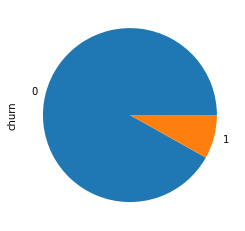

In [58]:
# lets find out churn/non churn percentage
print((churn_filtered['churn'].value_counts()/len(churn))*100)
((churn_filtered['churn'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

## As we can see that 97% of the customers do not churn, there is a possibility of class imbalance

Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped forn the dataset.

In [59]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in churn_filtered.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [60]:
# Dropping the selected churn phase columns
churn_filtered.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
churn_filtered.shape

(30001, 150)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [61]:
#churn['total_rech_amt_data_6']=churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
# churn['total_rech_amt_data_7']=churn['av_rech_amt_data_7'] * churn['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9

# churn['overall_rech_amt_6'] = churn['total_rech_amt_data_6'] + churn['total_rech_amt_6']
# churn['overall_rech_amt_7'] = churn['total_rech_amt_data_7'] + churn['total_rech_amt_7']

churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies

In [62]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [63]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

fb_user_6           night_pck_user_6     0.956620
fb_user_7           night_pck_user_7     0.956322
total_rech_amt_8    arpu_8               0.955351
fb_user_8           night_pck_user_8     0.954831
isd_og_mou_8        isd_og_mou_7         0.943120
                    isd_og_mou_6         0.918187
isd_og_mou_7        isd_og_mou_6         0.915247
sachet_2g_8         total_rech_data_8    0.900629
total_ic_mou_6      loc_ic_mou_6         0.895069
total_ic_mou_8      loc_ic_mou_8         0.893149
total_ic_mou_7      loc_ic_mou_7         0.883005
std_og_t2t_mou_8    onnet_mou_8          0.860771
std_og_t2t_mou_7    onnet_mou_7          0.860381
std_og_t2t_mou_6    onnet_mou_6          0.859471
std_og_t2m_mou_7    offnet_mou_7         0.855018
std_og_t2m_mou_8    offnet_mou_8         0.851995
total_og_mou_8      std_og_mou_8         0.851063
total_og_mou_7      std_og_mou_7         0.849570
loc_ic_mou_8        loc_ic_t2m_mou_8     0.846955
std_ic_mou_8        std_ic_t2m_mou_8     0.845795


In [64]:
col_to_drop=['fb_user_6','fb_user_7','fb_user_8','total_rech_amt_8','isd_og_mou_8',
             'sachet_2g_8','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7',               
               'std_og_t2t_mou_8','std_og_t2t_mou_7','total_og_mou_8','std_og_t2m_mou_8' ,'total_og_mou_7',
             'std_ic_mou_8','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [65]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(30001, 126)

# Data preparation

## 1. Deriving new variables to understand the data

## 2. EDA

In [66]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

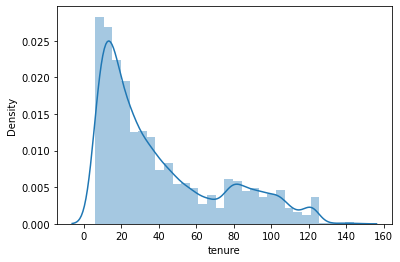

In [67]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [68]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0    2-5 Yrs    
1    2-5 Yrs    
2    6-12 Months
3    1-2 Yrs    
4    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

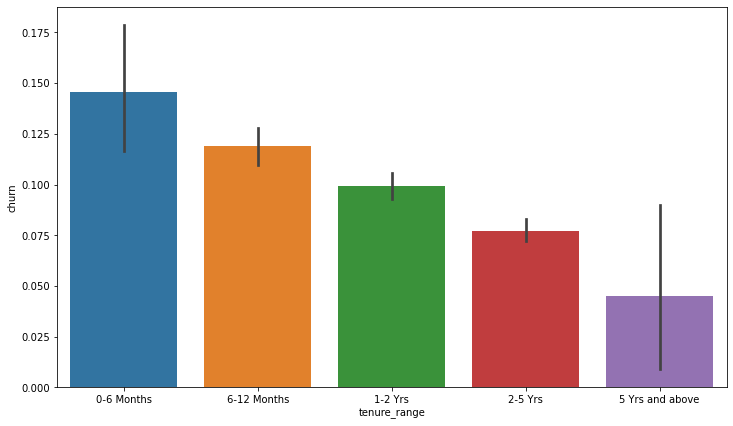

In [69]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_filtered)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns

In [70]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0    206.1005 
1    1209.5150
2    435.4720 
3    556.1030 
4    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [71]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(30001, 126)

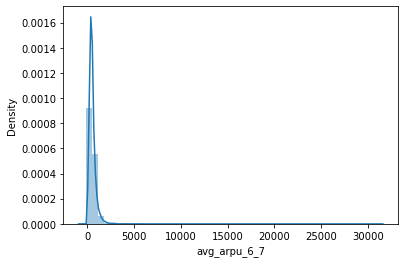

In [72]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

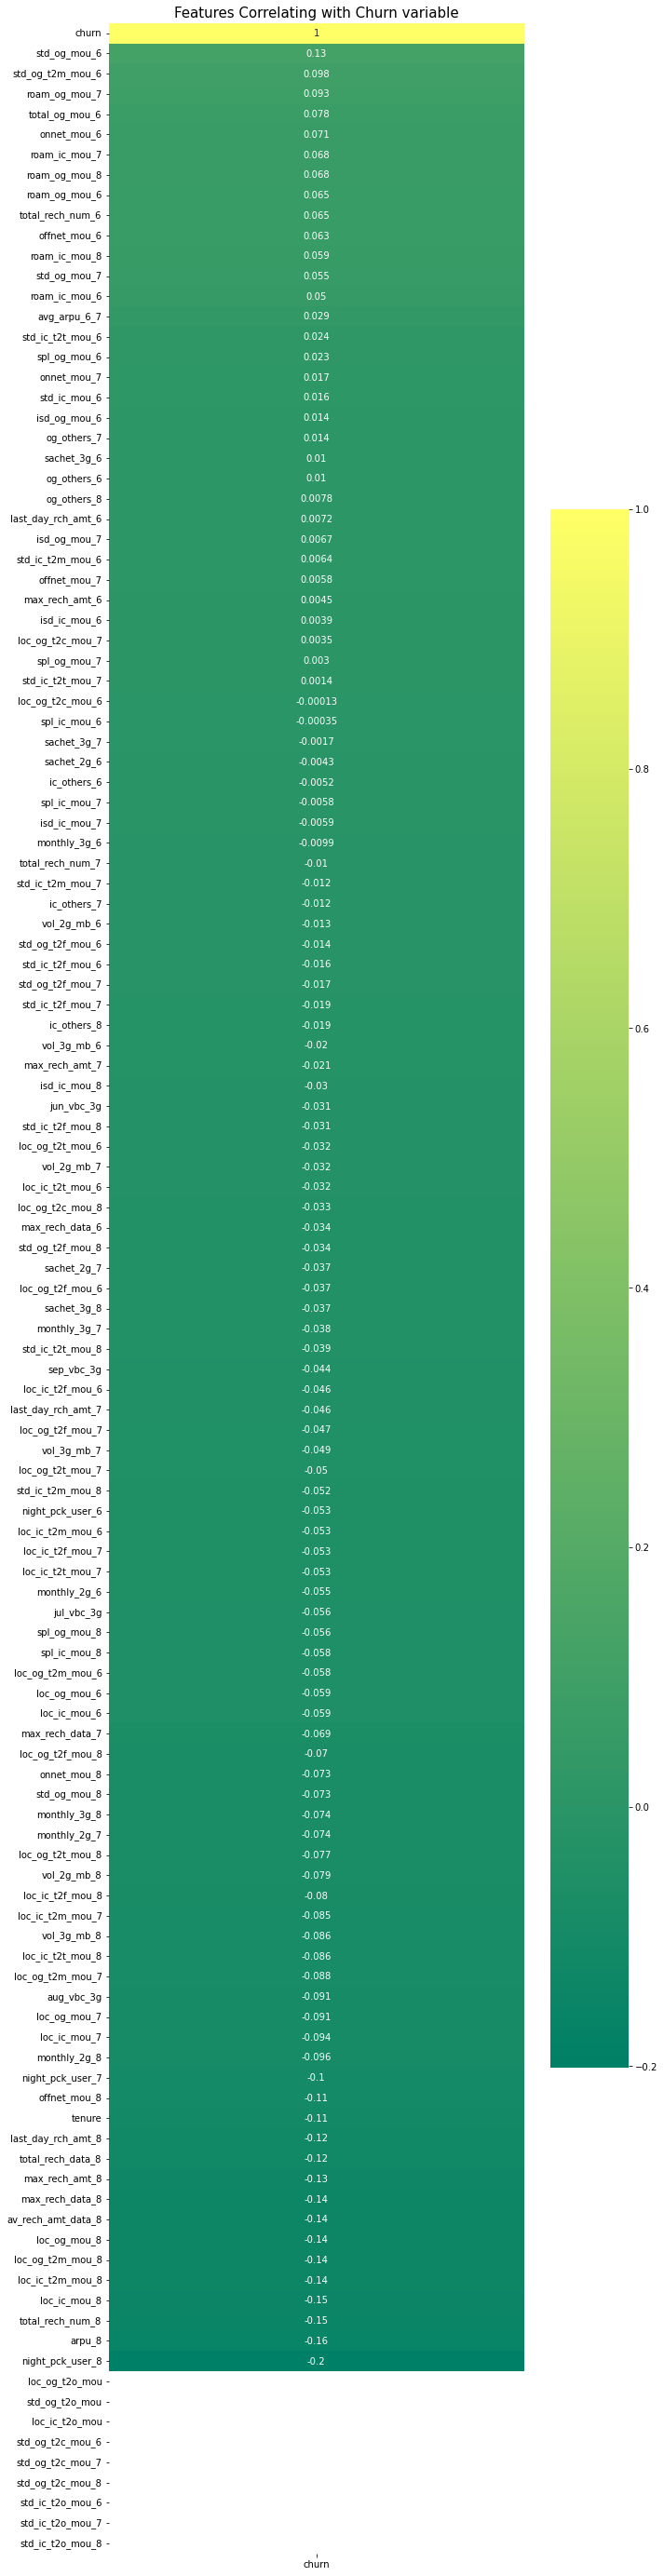

In [73]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. . Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

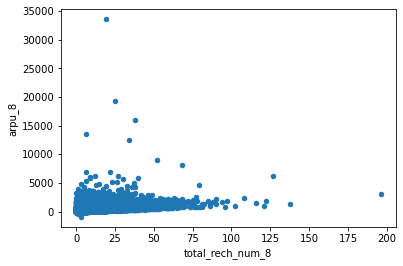

In [74]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [75]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


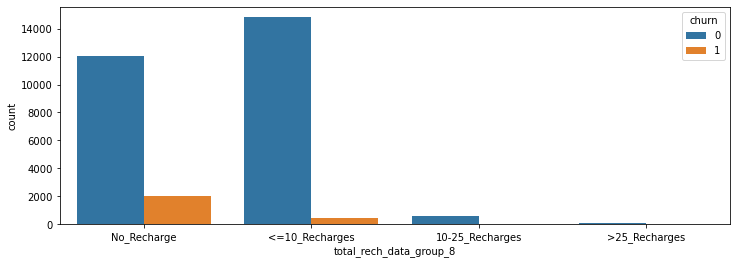

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges    8245 
>25_Recharges      1824 
No_Recharge        583  
Name: total_rech_num_group_8, dtype: int64


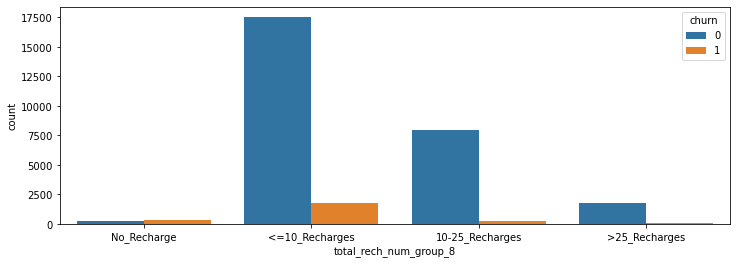

In [76]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [77]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

now we can drop all "mou related" columns except onnet and offnet variables

In [78]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [79]:
churn_filtered.shape

(30001, 47)

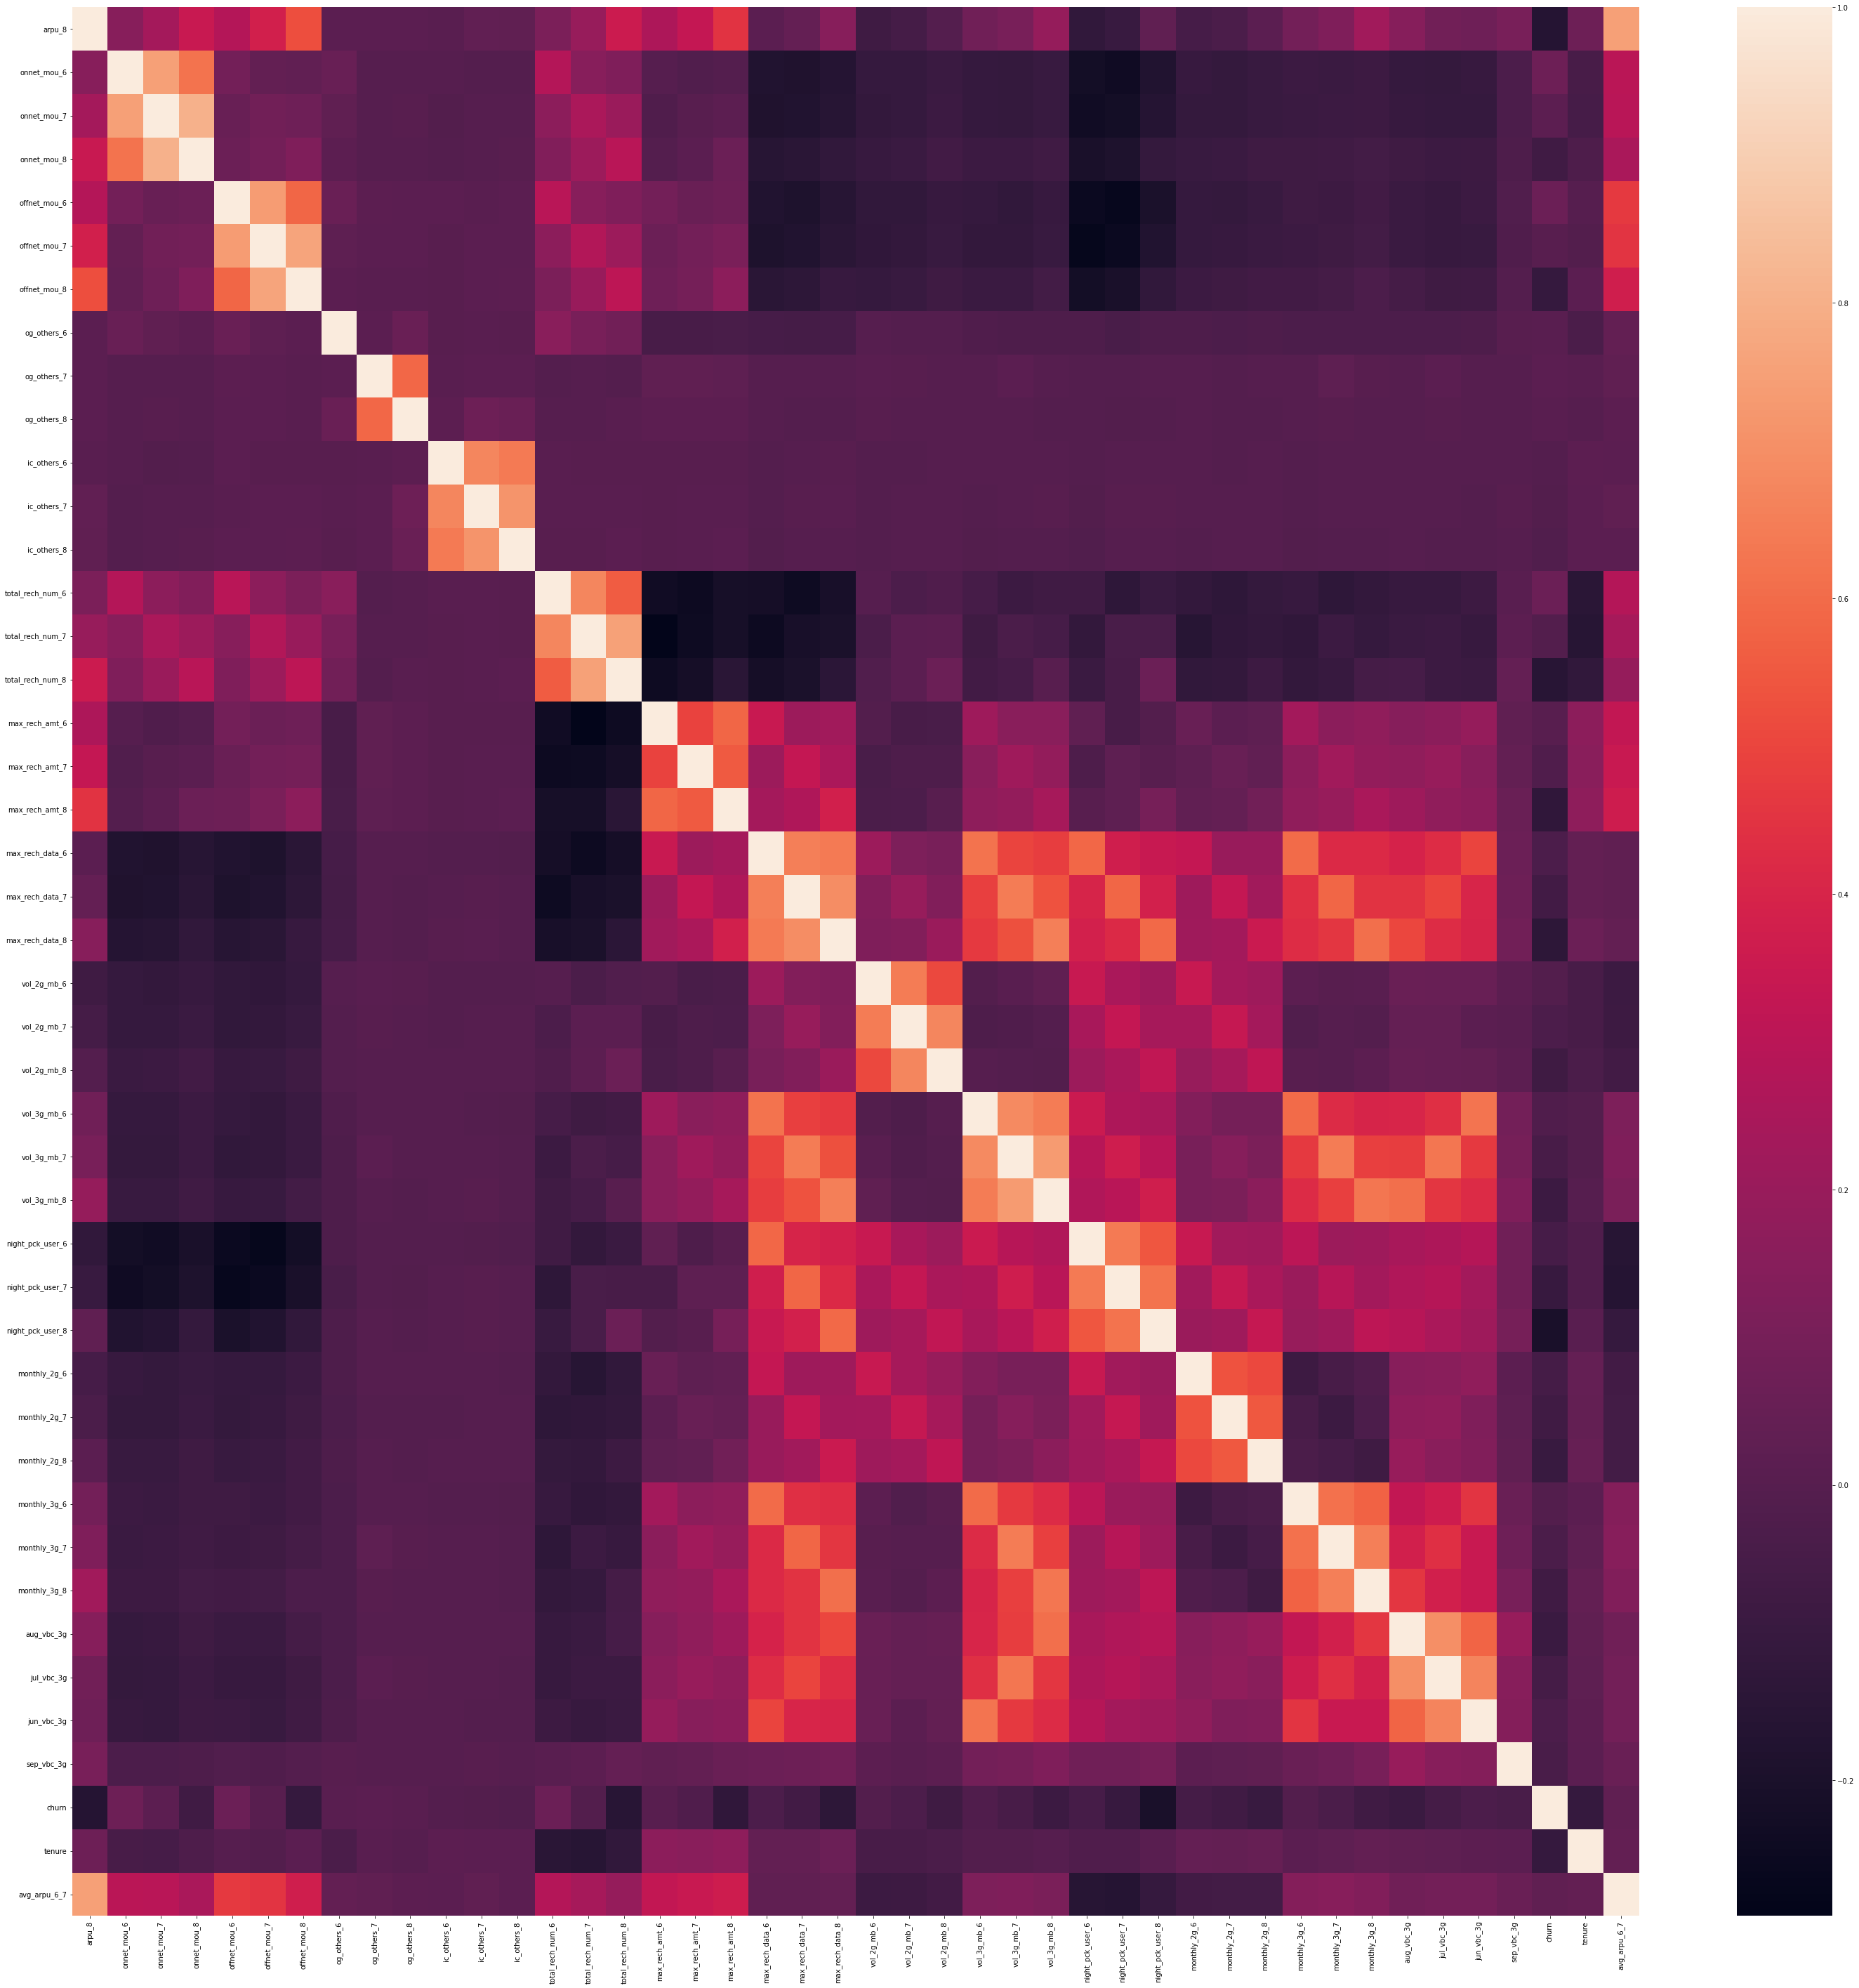

In [80]:
plt.figure(figsize = (50, 50))
sns.heatmap(churn_filtered.corr())
plt.show()

In [81]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   30001 non-null  float64 
 1   onnet_mou_6              30001 non-null  float64 
 2   onnet_mou_7              30001 non-null  float64 
 3   onnet_mou_8              30001 non-null  float64 
 4   offnet_mou_6             30001 non-null  float64 
 5   offnet_mou_7             30001 non-null  float64 
 6   offnet_mou_8             30001 non-null  float64 
 7   og_others_6              30001 non-null  float64 
 8   og_others_7              30001 non-null  float64 
 9   og_others_8              30001 non-null  float64 
 10  ic_others_6              30001 non-null  float64 
 11  ic_others_7              30001 non-null  float64 
 12  ic_others_8              30001 non-null  float64 
 13  total_rech_num_6         30001 non-null  int64   
 14  total_

In [82]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)


In [83]:
churn_filtered.shape

(30001, 45)

In [84]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   arpu_8            30001 non-null  float64 
 1   onnet_mou_6       30001 non-null  float64 
 2   onnet_mou_7       30001 non-null  float64 
 3   onnet_mou_8       30001 non-null  float64 
 4   offnet_mou_6      30001 non-null  float64 
 5   offnet_mou_7      30001 non-null  float64 
 6   offnet_mou_8      30001 non-null  float64 
 7   og_others_6       30001 non-null  float64 
 8   og_others_7       30001 non-null  float64 
 9   og_others_8       30001 non-null  float64 
 10  ic_others_6       30001 non-null  float64 
 11  ic_others_7       30001 non-null  float64 
 12  ic_others_8       30001 non-null  float64 
 13  total_rech_num_6  30001 non-null  int64   
 14  total_rech_num_7  30001 non-null  int64   
 15  total_rech_num_8  30001 non-null  int64   
 16  max_rech_amt_6    3000

In [85]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [86]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            30001 non-null  float64
 1   onnet_mou_6       30001 non-null  float64
 2   onnet_mou_7       30001 non-null  float64
 3   onnet_mou_8       30001 non-null  float64
 4   offnet_mou_6      30001 non-null  float64
 5   offnet_mou_7      30001 non-null  float64
 6   offnet_mou_8      30001 non-null  float64
 7   og_others_6       30001 non-null  float64
 8   og_others_7       30001 non-null  float64
 9   og_others_8       30001 non-null  float64
 10  ic_others_6       30001 non-null  float64
 11  ic_others_7       30001 non-null  float64
 12  ic_others_8       30001 non-null  float64
 13  total_rech_num_6  30001 non-null  int64  
 14  total_rech_num_7  30001 non-null  int64  
 15  total_rech_num_8  30001 non-null  int64  
 16  max_rech_amt_6    30001 non-null  int64 

In [87]:
churn_rate = (sum(churn_filtered["churn"])/len(churn_filtered["churn"].index))*100
churn_rate

8.136395453484884

# Split Data Into Train and Test Data

In [88]:
churn_filtered.shape

(30001, 44)

In [90]:
#divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [91]:
# print shapes of train and test sets
X_train.shape

(22500, 43)

In [92]:
y_train.shape

(22500,)

In [93]:
X_test.shape

(7501, 43)

In [94]:
y_test.shape

(7501,)

# Perform Scaling

In [95]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,183.004,3.93,0.00,0.00,4.09,0.16,15.46,0.00,0.0,0.0,0.00,0.00,0.00,6,0,3,198,0,198,198.0,0.0,198.0,1916.23,0.0,2902.44,0.00,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0.00,0.00,0.0,0.0,20.0,111.4590
12436,62.260,5.44,11.20,0.00,39.46,11.64,37.74,0.00,0.0,0.0,26.49,12.34,2.01,5,5,6,86,110,0,252.0,252.0,252.0,9.62,65.2,31.10,2068.61,1982.61,3087.72,0.0,0.0,0.0,0,0,0,2,2,2,955.97,1613.36,735.4,0.0,11.0,93.4050
29024,24.750,725.11,671.44,11.76,145.63,80.66,2.50,2.33,0.0,0.0,0.13,0.26,0.00,9,6,2,128,150,0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,10.0,523.5985
11193,422.360,17.93,37.53,23.89,526.68,831.58,671.01,0.00,0.0,0.0,0.00,10.73,0.00,39,46,32,50,47,47,17.0,0.0,0.0,62.01,0.0,0.00,0.00,0.00,0.00,0.0,-1.0,-1.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,28.0,487.7310
10907,2300.151,7.53,11.88,56.49,788.53,1441.28,5453.33,0.98,0.0,0.0,0.00,0.00,0.00,4,8,27,120,130,130,0.0,0.0,17.0,0.00,0.0,58.26,0.00,0.00,0.00,-1.0,-1.0,0.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,81.0,497.1310


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            22500 non-null  float64
 1   onnet_mou_6       22500 non-null  float64
 2   onnet_mou_7       22500 non-null  float64
 3   onnet_mou_8       22500 non-null  float64
 4   offnet_mou_6      22500 non-null  float64
 5   offnet_mou_7      22500 non-null  float64
 6   offnet_mou_8      22500 non-null  float64
 7   og_others_6       22500 non-null  float64
 8   og_others_7       22500 non-null  float64
 9   og_others_8       22500 non-null  float64
 10  ic_others_6       22500 non-null  float64
 11  ic_others_7       22500 non-null  float64
 12  ic_others_8       22500 non-null  float64
 13  total_rech_num_6  22500 non-null  int64  
 14  total_rech_num_7  22500 non-null  int64  
 15  total_rech_num_8  22500 non-null  int64  
 16  max_rech_amt_6    22500 non-null  int

In [97]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [98]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [99]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.019544,0.000000,0.015306,0.049377,0.000000,0.044504,0.127331,0.000000,0.127331,0.186297,0.000000,0.261067,0.00000,0.000000,0.0000,0.5,0.0,0.5,0.25,0.0,0.2,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.101449,0.026756
12436,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.000000,0.0,0.0,0.019708,0.008249,0.001661,0.016287,0.036232,0.030612,0.021446,0.027431,0.000000,0.162058,0.162058,0.162058,0.000935,0.008281,0.002797,0.04523,0.070445,0.1028,0.5,0.5,0.5,0.00,0.0,0.0,0.142857,0.125,0.125,0.074013,0.176023,0.065859,0.0,0.036232,0.026196
29024,0.028141,0.103423,0.090600,0.001639,0.020916,0.008344,0.000178,0.033045,0.0,0.0,0.000097,0.000174,0.000000,0.029316,0.043478,0.010204,0.031920,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.028986,0.039560
11193,0.039669,0.002557,0.005064,0.003330,0.075646,0.086021,0.047904,0.000000,0.0,0.0,0.000000,0.007173,0.000000,0.127036,0.333333,0.163265,0.012469,0.011721,0.010564,0.010932,0.000000,0.000000,0.006029,0.000000,0.000000,0.00000,0.000000,0.0000,0.5,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.159420,0.038446
10907,0.094115,0.001074,0.001603,0.007874,0.113255,0.149091,0.389319,0.013899,0.0,0.0,0.000000,0.000000,0.000000,0.013029,0.057971,0.137755,0.029925,0.032419,0.029220,0.000000,0.000000,0.010932,0.000000,0.000000,0.005240,0.00000,0.000000,0.0000,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.543478,0.038738


# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection

## Data Imbalance Handling

Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [101]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 43)
Dimension of y_train_sm Shape: (41338,)


# Logistic Regression

In [102]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [103]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41294
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Dec 2022   Deviance:                       38351.
Time:                        16:28:12   Pearson chi2:                 5.59e+08
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1909      0.067     17.730      0.000       1.059       1.322
arpu_8             -21.3748      3.015     -7.089      0.000     -27.284     -15.466
onnet_mou_6          1.3007      0.348      3.743      0.000       0.620       1.982
onnet_mou_7          2.3250      0.483      4.817      0.000       1.379       3.271
onnet_mou_8         -5.8496      0.532    -11.000      0.000      -6.892      -4.807
offnet_mou_6         0.9268      0.345      2.686      0.007       0.250       1.603
offnet_mou_7         5.6821      0.622      9.136      0.000       4.463       6.901
offnet_mou_8       -27.1913      1.228    -22.137      0.000     -29.599     -24.784
og_others_6         -3.4394      0.514     -6.695      0.000      -4.446      -2.432
og_others_7         -2.9676      5.183     -0.573      0.567     -13.127       7.192
og_others_8      -1863.8168    865.382     -2.154      0.031   -3559.934    -167.700
ic_others_6        -15.9516      4.851     -3.288      0.001     -25.460      -6.443
ic_others_7          1.9219      2.608      0.737      0.461      -3.190       7.034
ic_others_8        -27.3391      4.769     -5.732      0.000     -36.686     -17.992
total_rech_num_6     5.0031      0.781      6.408      0.000       3.473       6.533
total_rech_num_7     4.1948      0.422      9.943      0.000       3.368       5.022
total_rech_num_8   -20.2576      0.746    -27.156      0.000     -21.720     -18.796
max_rech_amt_6       0.8949      0.425      2.104      0.035       0.061       1.729
max_rech_amt_7       2.0053      0.368      5.456      0.000       1.285       2.726
max_rech_amt_8      -4.7172      0.576     -8.191      0.000      -5.846      -3.588
max_rech_data_6      0.3423      0.381      0.897      0.370      -0.405       1.090
max_rech_data_7      2.6352      0.413      6.378      0.000       1.825       3.445
max_rech_data_8     -0.7441      0.515     -1.446      0.148      -1.753       0.264
vol_2g_mb_6          1.9037      0.657      2.898      0.004       0.616       3.191
vol_2g_mb_7          4.1075      0.595      6.899      0.000       2.940       5.274
vol_2g_mb_8        -13.8426      1.249    -11.084      0.000     -16.290     -11.395
vol_3g_mb_6          4.9272      1.497      3.292      0.001       1.994       7.860
vol_3g_mb_7          1.4755      1.110      1.329      0.184      -0.701       3.652
vol_3g_mb_8         -6.7477      1.365     -4.942      0.000      -9.424      -4.072
night_pck_user_6     0.2427      0.084      2.887      0.004       0.078       0.407
night_pck_user_7    -0.5403      0.089     -6.102      0.000      -0.714      -0.367
night_pck_user_8    -1.5041      0.085    -17.604      0.000      -1.672      -1.337
monthly_2g_6        -1.0121      0.188     -5.394      0.000      -1.380      -0.644
monthly_2g_7        -2.

## Logistic Regression using Feature Selection (RFE method) 

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [105]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True])

In [106]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'og_others_6', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [107]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 19),
 ('og_others_8', False, 20),
 ('ic_others_6', False, 12),
 ('ic_others_7', False, 14),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 11),
 ('max_rech_amt_7', False, 5),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 15),
 ('max_rech_data_7', False, 10),
 ('max_rech_data_8', False, 18),
 ('vol_2g_mb_6', False, 13),
 ('vol_2g_mb_7', False, 3),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 2),
 ('vol_3g_mb_7', False, 17),
 ('vol_3g_mb_8', False, 6),
 ('night_pck_user_6', False, 22),
 ('night_pck_user_7', False, 21),
 ('night_pck_user_8', False, 4),
 ('monthly_2g_6', False, 16),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1)

## Assessing the model with StatsModels 

In [108]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20140.
Date:                Tue, 06 Dec 2022   Deviance:                       40279.
Time:                        16:30:34   Pearson chi2:                 1.38e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6607      0.059     11.135      0.000       0.544       0.777
arpu_8             -30.2547      2.837    -10.666      0.000     -35.814     -24.695
onnet_mou_6          0.8666      0.331      2.619      0.009       0.218       1.515
onnet_mou_7          1.9986      0.464      4.312      0.000       1.090       2.907
onnet_mou_8         -4.5567      0.515     -8.849      0.000      -5.566      -3.547
offnet_mou_7         5.9223      0.534     11.088      0.000       4.875       6.969
offnet_mou_8       -26.0690      1.200    -21.722      0.000     -28.421     -23.717
og_others_6         -2.8223      0.496     -5.691      0.000      -3.794      -1.850
ic_others_8        -30.8994      4.611     -6.701      0.000     -39.937     -21.861
total_rech_num_6     7.0009      0.688     10.169      0.000       5.652       8.350
total_rech_num_7     4.0281      0.373     10.785      0.000       3.296       4.760
total_rech_num_8   -23.5592      0.719    -32.772      0.000     -24.968     -22.150
max_rech_amt_8      -5.1385      0.506    -10.158      0.000      -6.130      -4.147
vol_2g_mb_8        -15.1002      1.075    -14.042      0.000     -17.208     -12.993
monthly_2g_7        -1.5811      0.201     -7.861      0.000      -1.975      -1.187
monthly_2g_8        -5.9794      0.323    -18.485      0.000      -6.613      -5.345
monthly_3g_6         2.6790      0.403      6.640      0.000       1.888       3.470
monthly_3g_8        -7.7425      0.668    -11.596      0.000      -9.051      -6.434
aug_vbc_3g         -11.2160      0.876    -12.805      0.000     -12.933      -9.499
sep_vbc_3g         -53.1497      4.147    -12.817      0.000     -61.277     -45.022
avg_arpu_6_7        37.2017      2.318     16.047      0.000      32.658      41.746
====================================================================================
"""

In [109]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.01362043e-03, 2.17792738e-01, 8.36945529e-01, 1.79447456e-01,
       1.79098640e-06, 2.92299523e-01, 8.11385460e-02, 6.75277336e-06,
       5.86271063e-01, 1.84647613e-01])

## Creating a dataframe with the actual churn flag and the predicted probabilities 

In [110]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.007014
1,0,0.217793
2,1,0.836946
3,0,0.179447
4,0,0.000002


## Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0 

In [111]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.007014,0
1,0,0.217793,0
2,1,0.836946,1
3,0,0.179447,0
4,0,0.000002,0


In [112]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15846  4823]
 [ 3950 16719]]


## Confusion matrix

## Predicted not_churn churn

## Actual

## not_churn 15846 4823

## churn 3950 16719

In [114]:
 #Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7877739610044028


## Check for the VIF values of the feature variables 

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,38.86
19,avg_arpu_6_7,37.60
9,total_rech_num_7,7.43
8,total_rech_num_6,5.70
2,onnet_mou_7,5.38
10,total_rech_num_8,5.31
4,offnet_mou_7,4.24
5,offnet_mou_8,3.97
1,onnet_mou_6,3.68
3,onnet_mou_8,3.45


## Metrics beyond simply accuracy 

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8088925443901495
Specificity =  0.766655377618656
False Positive Rate =  0.23334462238134404
Precision =  0.7761117816358741
True Negative Prediction Rate =  0.8004647403515862


## Plotting the ROC Curve 

In [119]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

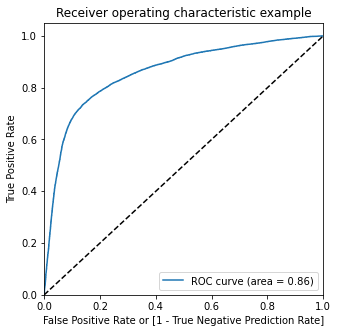

In [121]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

## Finding Optimal Cutoff Point 

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.605133  0.971406     0.238860   
0.2  0.2          0.668078  0.945571     0.390585   
0.3  0.3          0.718806  0.913348     0.524263   
0.4  0.4          0.759156  0.868595     0.649717   
0.5  0.5          0.787774  0.808893     0.766655   
0.6  0.6          0.797741  0.731627     0.863854   
0.7  0.7          0.769752  0.614447     0.925057   
0.8  0.8          0.674416  0.383231     0.965601   
0.9  0.9          0.558348  0.127389     0.989308   


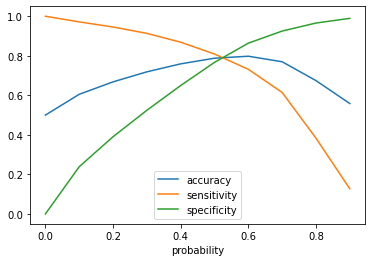

In [124]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [125]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.787774  0.808893     0.766655   
0.51  0.51         0.789153  0.801055     0.777251   
0.52  0.52         0.791620  0.794185     0.789056   
0.53  0.53         0.793144  0.786685     0.799603   
0.54  0.54         0.794233  0.779864     0.808602   
0.55  0.55         0.795467  0.772655     0.818279   
0.56  0.56         0.796846  0.764914     0.828777   
0.57  0.57         0.797039  0.756108     0.837970   
0.58  0.58         0.797426  0.748174     0.846679   
0.59  0.59         0.797595  0.739755     0.855436   


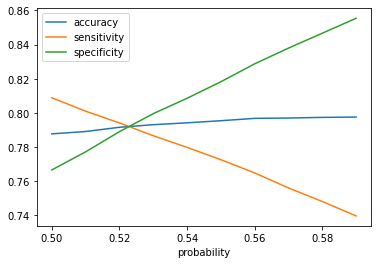

In [127]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [128]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.7931443224152112


In [130]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16527  4142]
 [ 4409 16260]]


In [131]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7866853742319415
Specificity =  0.7996032705984808
False Positive Rate =  0.20039672940151917
Precision =  0.7969806881678266
True Negative Prediction Rate =  0.7894058081773022


## Precision and recall tradeoff 

In [132]:
from sklearn.metrics import precision_recall_curve

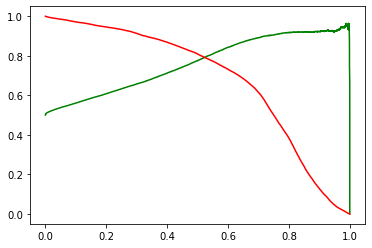

In [133]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set 

**Transforming and feature selection for test data**

In [134]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.062843,0.062843,0.056642,0.162058,0.162058,0.162058,0.001785,0.006578,0.002816,0.163451,0.159254,0.092118,0.5,0.5,0.5,0.0,0.0,0.0,0.428571,0.3750,0.1875,0.160223,0.217613,0.412013,0.000000,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.000000,0.0,0.0,0.000439,0.000201,0.0,0.013029,0.014493,0.015306,0.074813,0.087282,0.089908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.036232,0.025510,0.124688,0.084539,0.112385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000181,0.000000,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.028986,0.010204,0.062843,0.062843,0.000000,0.162058,0.162058,0.000000,0.003546,0.000170,0.000000,0.079117,0.037413,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.214286,0.0625,0.0000,0.000000,0.000000,0.092829,0.000000,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.087789,0.0,0.0,0.001518,0.000000,0.0,0.052117,0.173913,0.091837,0.012469,0.012469,0.009890,0.000000,0.010932,0.000000,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.069046,0.224638,0.041169


In [135]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,og_others_6,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_8,aug_vbc_3g,sep_vbc_3g,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.011408,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.056642,0.002816,0.0,0.0,0.428571,0.1875,0.160223,0.000000,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.007710,0.005207,0.000000,0.0,0.013029,0.014493,0.015306,0.089908,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.002716,0.001079,0.000000,0.0,0.016287,0.036232,0.025510,0.112385,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.000000,0.000843,0.000000,0.0,0.016287,0.028986,0.010204,0.000000,0.000000,0.0,0.0,0.214286,0.0000,0.000000,0.000000,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.107065,0.052672,0.087789,0.0,0.052117,0.173913,0.091837,0.009890,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.069046,0.041169


In [136]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable 

In [137]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.232613
10086    0.436469
18646    0.356630
10925    0.833367
24503    0.006767
10584    0.233125
2654     0.203539
23565    0.763606
5876     0.375729
19698    0.014449
dtype: float64


In [138]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.232613
10086,0.436469
18646,0.356630
10925,0.833367
24503,0.006767


In [139]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [140]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [141]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.232613
10086,0,0.436469
18646,0,0.356630
10925,1,0.833367
24503,0,0.006767


In [142]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.232613,0
10086,0,0.436469,0
18646,0,0.356630,0
10925,1,0.833367,1
24503,0,0.006767,0


In [143]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8073590187974937

## Metrics Evaluation 

In [144]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5589 1302]
 [ 143  467]]


In [145]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7655737704918033
Specificity =  0.8110579016107967
False Positive Rate =  0.1889420983892033
Precision =  0.2639909553420011
True Negative Prediction Rate =  0.9750523377529658


## Explaining the results 

In [147]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  81.0 %
The sensitivity of the predicted model is:  77.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



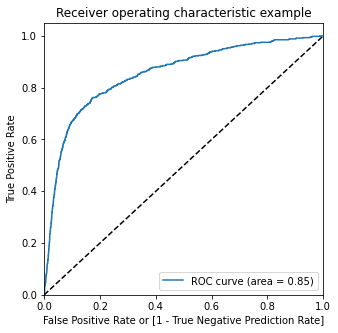

In [148]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

### The AUC score for train dataset is 0.86 and the test dataset is 0.85.

### This model can be considered as a good model.
 

## PCA 

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)


In [150]:
X_train.shape

(24000, 43)

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA(random_state=42)

In [153]:
pca.fit(X_train)

PCA(random_state=42)

In [154]:
pca.components_

array([[ 4.72029868e-02, -4.45900199e-02, -4.79398086e-02, ...,
         4.16107647e-03, -7.53971540e-05,  3.72096962e-02],
       [ 4.27156764e-01,  2.21480421e-01,  2.66437208e-01, ...,
         8.53620813e-04,  3.93561136e-04,  3.83160431e-01],
       [-2.27887707e-02,  4.67351056e-01,  5.28643300e-01, ...,
        -1.27539962e-03, -2.07145436e-03, -1.02944884e-02],
       ...,
       [ 4.92366118e-05,  6.25557356e-06, -2.83262151e-05, ...,
         2.53678280e-05, -5.88214198e-05, -4.00524309e-05],
       [ 2.39407849e-05, -1.32882224e-05,  2.51975263e-05, ...,
         5.18661703e-05,  5.21737690e-05, -1.90627697e-05],
       [ 1.73138863e-04,  2.46108654e-05,  1.81183885e-05, ...,
         1.22685675e-04, -2.12714129e-06, -1.67597411e-04]])

## Analysing the explained variance ratio 

In [155]:
pca.explained_variance_ratio_

array([4.23284569e-01, 1.50632979e-01, 9.41700737e-02, 6.20924527e-02,
       4.71778948e-02, 4.63575788e-02, 3.78120960e-02, 3.46933754e-02,
       2.25847992e-02, 1.36159065e-02, 1.02111554e-02, 9.45038613e-03,
       8.78227341e-03, 8.54760162e-03, 6.60256580e-03, 6.34517515e-03,
       5.59532232e-03, 3.26230811e-03, 2.85303020e-03, 2.09133734e-03,
       2.00508981e-03, 5.72578060e-04, 4.94444115e-04, 4.13760909e-04,
       1.79900641e-04, 1.05547629e-04, 2.40013181e-05, 1.50661247e-05,
       1.14591417e-05, 4.73060374e-06, 3.69307110e-06, 3.24496258e-06,
       2.61914288e-06, 7.06190381e-07, 9.65584348e-08, 5.59540455e-08,
       3.56265785e-08, 2.34316725e-08, 2.02799132e-08, 1.44779997e-08,
       1.19033188e-08, 1.03056558e-08, 9.71512076e-09])

In [156]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

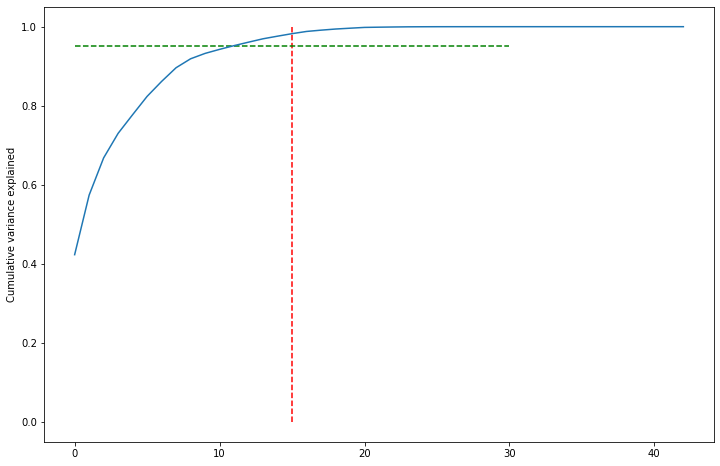

In [157]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**we can use Incremental PCA for the best result**

In [158]:
from sklearn.decomposition import IncrementalPCA

In [159]:
pca_final = IncrementalPCA(n_components=16)

In [160]:
df_train_pca = pca_final.fit_transform(X_train)

In [161]:
df_train_pca.shape

(24000, 16)

In [162]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [163]:
corrmat.shape

(16, 16)

In [164]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 16)

## Applying logistic regression on the Principal components 

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
learner_pca = LogisticRegression()

In [167]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set 

In [168]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [169]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

## Confusion matrix, Sensitivity and Specificity 

In [170]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [171]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5507   27]
 [ 418   49]]


In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9258456923846026
Sensitivity:- 0.10492505353319058
Specificity:- 0.9951210697506324


## Making predictions on the train set 

In [174]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [175]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.83'

## Confusion matrix, Sensitivity and Specificity 

In [176]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [177]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[21876   150]
 [ 1799   175]]


In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9187916666666667
Sensitivity:- 0.08865248226950355
Specificity:- 0.9931898665213839


## Decision Tree with PCA 

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [187]:
dt = DecisionTreeClassifier(random_state=42)

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [190]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [191]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [192]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140125,0.011383,0.002494,0.002056,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
1,0.125163,0.004376,0.001247,0.000431,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
2,0.115441,0.002483,0.002244,0.000432,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
3,0.117434,0.002675,0.001248,0.000431,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
4,0.118682,0.004291,0.001247,0.000432,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3


In [193]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.261051,0.005295,0.001753,4.368332e-04,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
41,0.258058,0.001636,0.001996,3.371748e-07,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
0,0.140125,0.011383,0.002494,2.055765e-03,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
1,0.125163,0.004376,0.001247,4.305726e-04,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
2,0.115441,0.002483,0.002244,4.319877e-04,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3


In [194]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [198]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [199]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [201]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [202]:
evaluate_model(dt_best)

Train Accuracy : 0.9315833333333333
Train Confusion Matrix:
[[21734   292]
 [ 1350   624]]
--------------------------------------------------
Test Accuracy : 0.9220129978336944
Test Confusion Matrix:
[[5430  104]
 [ 364  103]]


## Random Forest with PCA 

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)


In [205]:
rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [206]:
rf.oob_score_

0.91825

In [207]:
from sklearn.metrics import plot_roc_curve

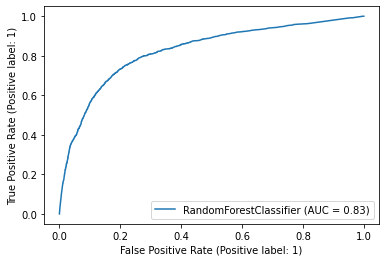

In [208]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

## Hyper-parameter tuning for the Random Forest 

In [209]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [210]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [211]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [212]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [213]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [214]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [215]:
grid_search.best_score_

0.9177499999999998

In [216]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [217]:
evaluate_model(rfc_model)

Train Accuracy : 0.91775
Train Confusion Matrix:
[[22026     0]
 [ 1974     0]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]


# Note:

**Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%**

# Conclusion : 

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.

The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

# Details:

After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

## Logistic Regression :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

### Logistic Regression 

 Train Accuracy : ~79% . Test Accuracy : ~80%

### Logistic regression with PCA 

Train Accuracy : ~91% . Test Accuracy : ~92%

### Decision Tree with PCA: 

 Train Accuracy : ~93% . Test Accuracy : ~92%

### Random Forest with PCA: 

Train Accuracy :~ 91% . Test Accuracy :~ 92%